<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/neural_network_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((train_images.shape[0],
                                     train_images.shape[1],
                                     train_images.shape[2], 1))

test_images = test_images.reshape((test_images.shape[0],
                                   test_images.shape[1],
                                   test_images.shape[2], 1))

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# splitting training dataset into training and validation sets
val_images = train_images[:10000]
partial_images = train_images[10000:]
val_labels = y_train[:10000]
partial_labels = y_train[10000:]

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

history = model.fit(partial_images, partial_labels,
                    batch_size=128,
                    epochs=25,
                    validation_data=(val_images, val_labels)
                    callbacks=[earlystopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

KeyboardInterrupt: 

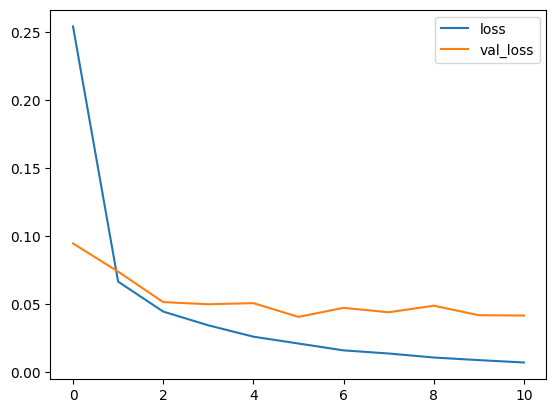

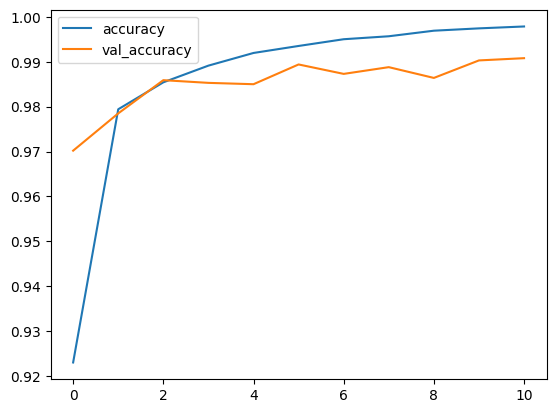

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
